In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [3]:
path = "C:/Users/Lenovo/Desktop/New folder/Global.csv"

In [4]:
df = pd.read_csv(path)

In [5]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


In [6]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


# Cheking Null values in the dataframe

In [7]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [8]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

# Data frame Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available. 

# checking the datatypes of columns.

In [9]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

# Generalized Imputation

# use fillna()function to use mean,median and mode

In [62]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,0.0,0.0,0.0,658.0,2.5,28.1839,73.2407,2.5,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,1.0,520.0,98.0,24.7663,74.6090,98.0,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,2.0,854.0,39.2,21.9038,69.3732,39.2,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,3.0,0.0,135.0,23.8712,91.3602,135.0,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,0.0,0.0,4.0,1.0,1800.0,21.9603,82.4091,1800.0,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [63]:
#inpute missing latitude with median(numeric variable)
df['latitude'].fillna(df['latitude'].median(),inplace = True)

In [71]:
df['longitude'].fillna(df['longitude'].median(),inplace = True)


df['commissioning_year'].fillna(df['commissioning_year'].median(),inplace = True)

df['wepp_id'].fillna(df['wepp_id'].median(),inplace = True)
df['year_of_capacity_data'].fillna(df['year_of_capacity_data'].median(),inplace = True)
df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].median(),inplace = True)
df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].median(),inplace = True)
df['generation_gwh_2014'].fillna(df['generation_gwh_2015'].median(),inplace = True)
df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].median(),inplace = True)
df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].median(),inplace = True)

df['estimated_generation_gwh'].fillna(df['estimated_generation_gwh'].median(),inplace = True)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    float64
 1   country_long              908 non-null    float64
 2   name                      908 non-null    float64
 3   gppd_idnr                 908 non-null    float64
 4   capacity_mw               908 non-null    float64
 5   latitude                  908 non-null    float64
 6   longitude                 908 non-null    float64
 7   primary_fuel              908 non-null    float64
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        908 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

# I observe that the "Fuel type"has contiuous data but it is an object type.Let handle this column.

In [10]:
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [11]:
df['capacity_mw'].unique()

array([2.50000e+00, 9.80000e+01, 3.92000e+01, 1.35000e+02, 1.80000e+03,
       2.50000e+02, 6.00000e+01, 1.92000e+02, 2.90000e+02, 2.10000e+02,
       1.35000e+03, 1.34000e+02, 1.20000e+03, 1.69500e+01, 9.00000e+00,
       2.63000e+03, 4.19330e+02, 6.00000e+02, 1.00000e+01, 1.70000e+01,
       2.40000e+01, 6.52000e+02, 4.60000e+01, 5.00000e+01, 1.00000e+00,
       1.65000e+01, 1.13600e+02, 1.98000e+01, 1.32000e+01, 5.00000e+00,
       2.00000e+02, 7.05000e+02, 2.80000e+01, 4.50000e+02, 1.80000e+02,
       1.05000e+03, 5.10000e+02, 6.75000e+01, 3.00000e+02, 4.55000e+02,
       1.20000e+01, 3.15000e+02, 3.00000e+01, 2.00000e+01, 4.20000e+01,
       7.20000e+02, 9.00000e+01, 1.32000e+03, 1.20000e+02, 6.40000e+01,
       2.70000e+02, 2.28000e+01, 1.50000e+01, 2.52000e+01, 1.80000e+01,
       1.70000e+03, 4.10000e+01, 1.32500e+03, 3.40000e+01, 1.60000e+01,
       5.00000e+02, 8.00000e+01, 7.50000e+01, 1.21000e+03, 9.90000e+01,
       6.96000e+01, 6.00000e+00, 4.00000e+01, 1.65000e+02, 7.500

In [12]:
df.loc[df['primary_fuel']==" "]

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh


In [13]:
df.loc[df['capacity_mw']==" "]

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh


In [14]:
df["primary_fuel"]=df["capacity_mw"].replace(" ",np.nan)

In [15]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [16]:
df["primary_fuel"]=df["primary_fuel"].astype(float)
df["capacity_mw"]=df["capacity_mw"].astype(float)

In [17]:
df["primary_fuel"]=df["primary_fuel"].fillna(np.mean(df["primary_fuel"]))
df["capacity_mw"]=df["capacity_mw"].fillna(np.mean(df["capacity_mw"]))

In [18]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [19]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                float64
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

# Making dtatframe for the nominal data

In [20]:
df_visualization_nominal=df[['country','country_long',                
'name',                        
'gppd_idnr',                    
'latitude',                  
'longitude',                  
'other_fuel1',                  
'other_fuel2',                  
'other_fuel3',                
'commissioning_year',        
'owner',                        
'source',                      
'url',                         
'geolocation_source',         
'wepp_id',                    
'year_of_capacity_data',      
'generation_gwh_2013',         
'generation_gwh_2014',         
'generation_gwh_2015',        
'generation_gwh_2016',         
'generation_gwh_2017',         
'generation_data_source',       
'estimated_generation_gwh']].copy()

In [21]:
df_visualization_nominal.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'latitude', 'longitude',
       'other_fuel1', 'other_fuel2', 'other_fuel3', 'commissioning_year',
       'owner', 'source', 'url', 'geolocation_source', 'wepp_id',
       'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_data_source', 'estimated_generation_gwh'],
      dtype='object')

# visulization of the data:

In [22]:
import seaborn as sns

IND    908
Name: country, dtype: int64


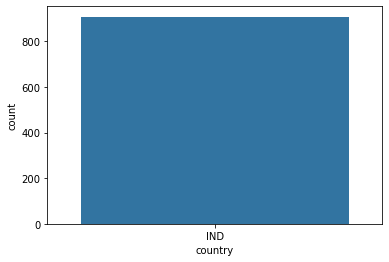

In [23]:
ax=sns.countplot(x="country",data=df_visualization_nominal)
print(df_visualization_nominal["country"].value_counts())

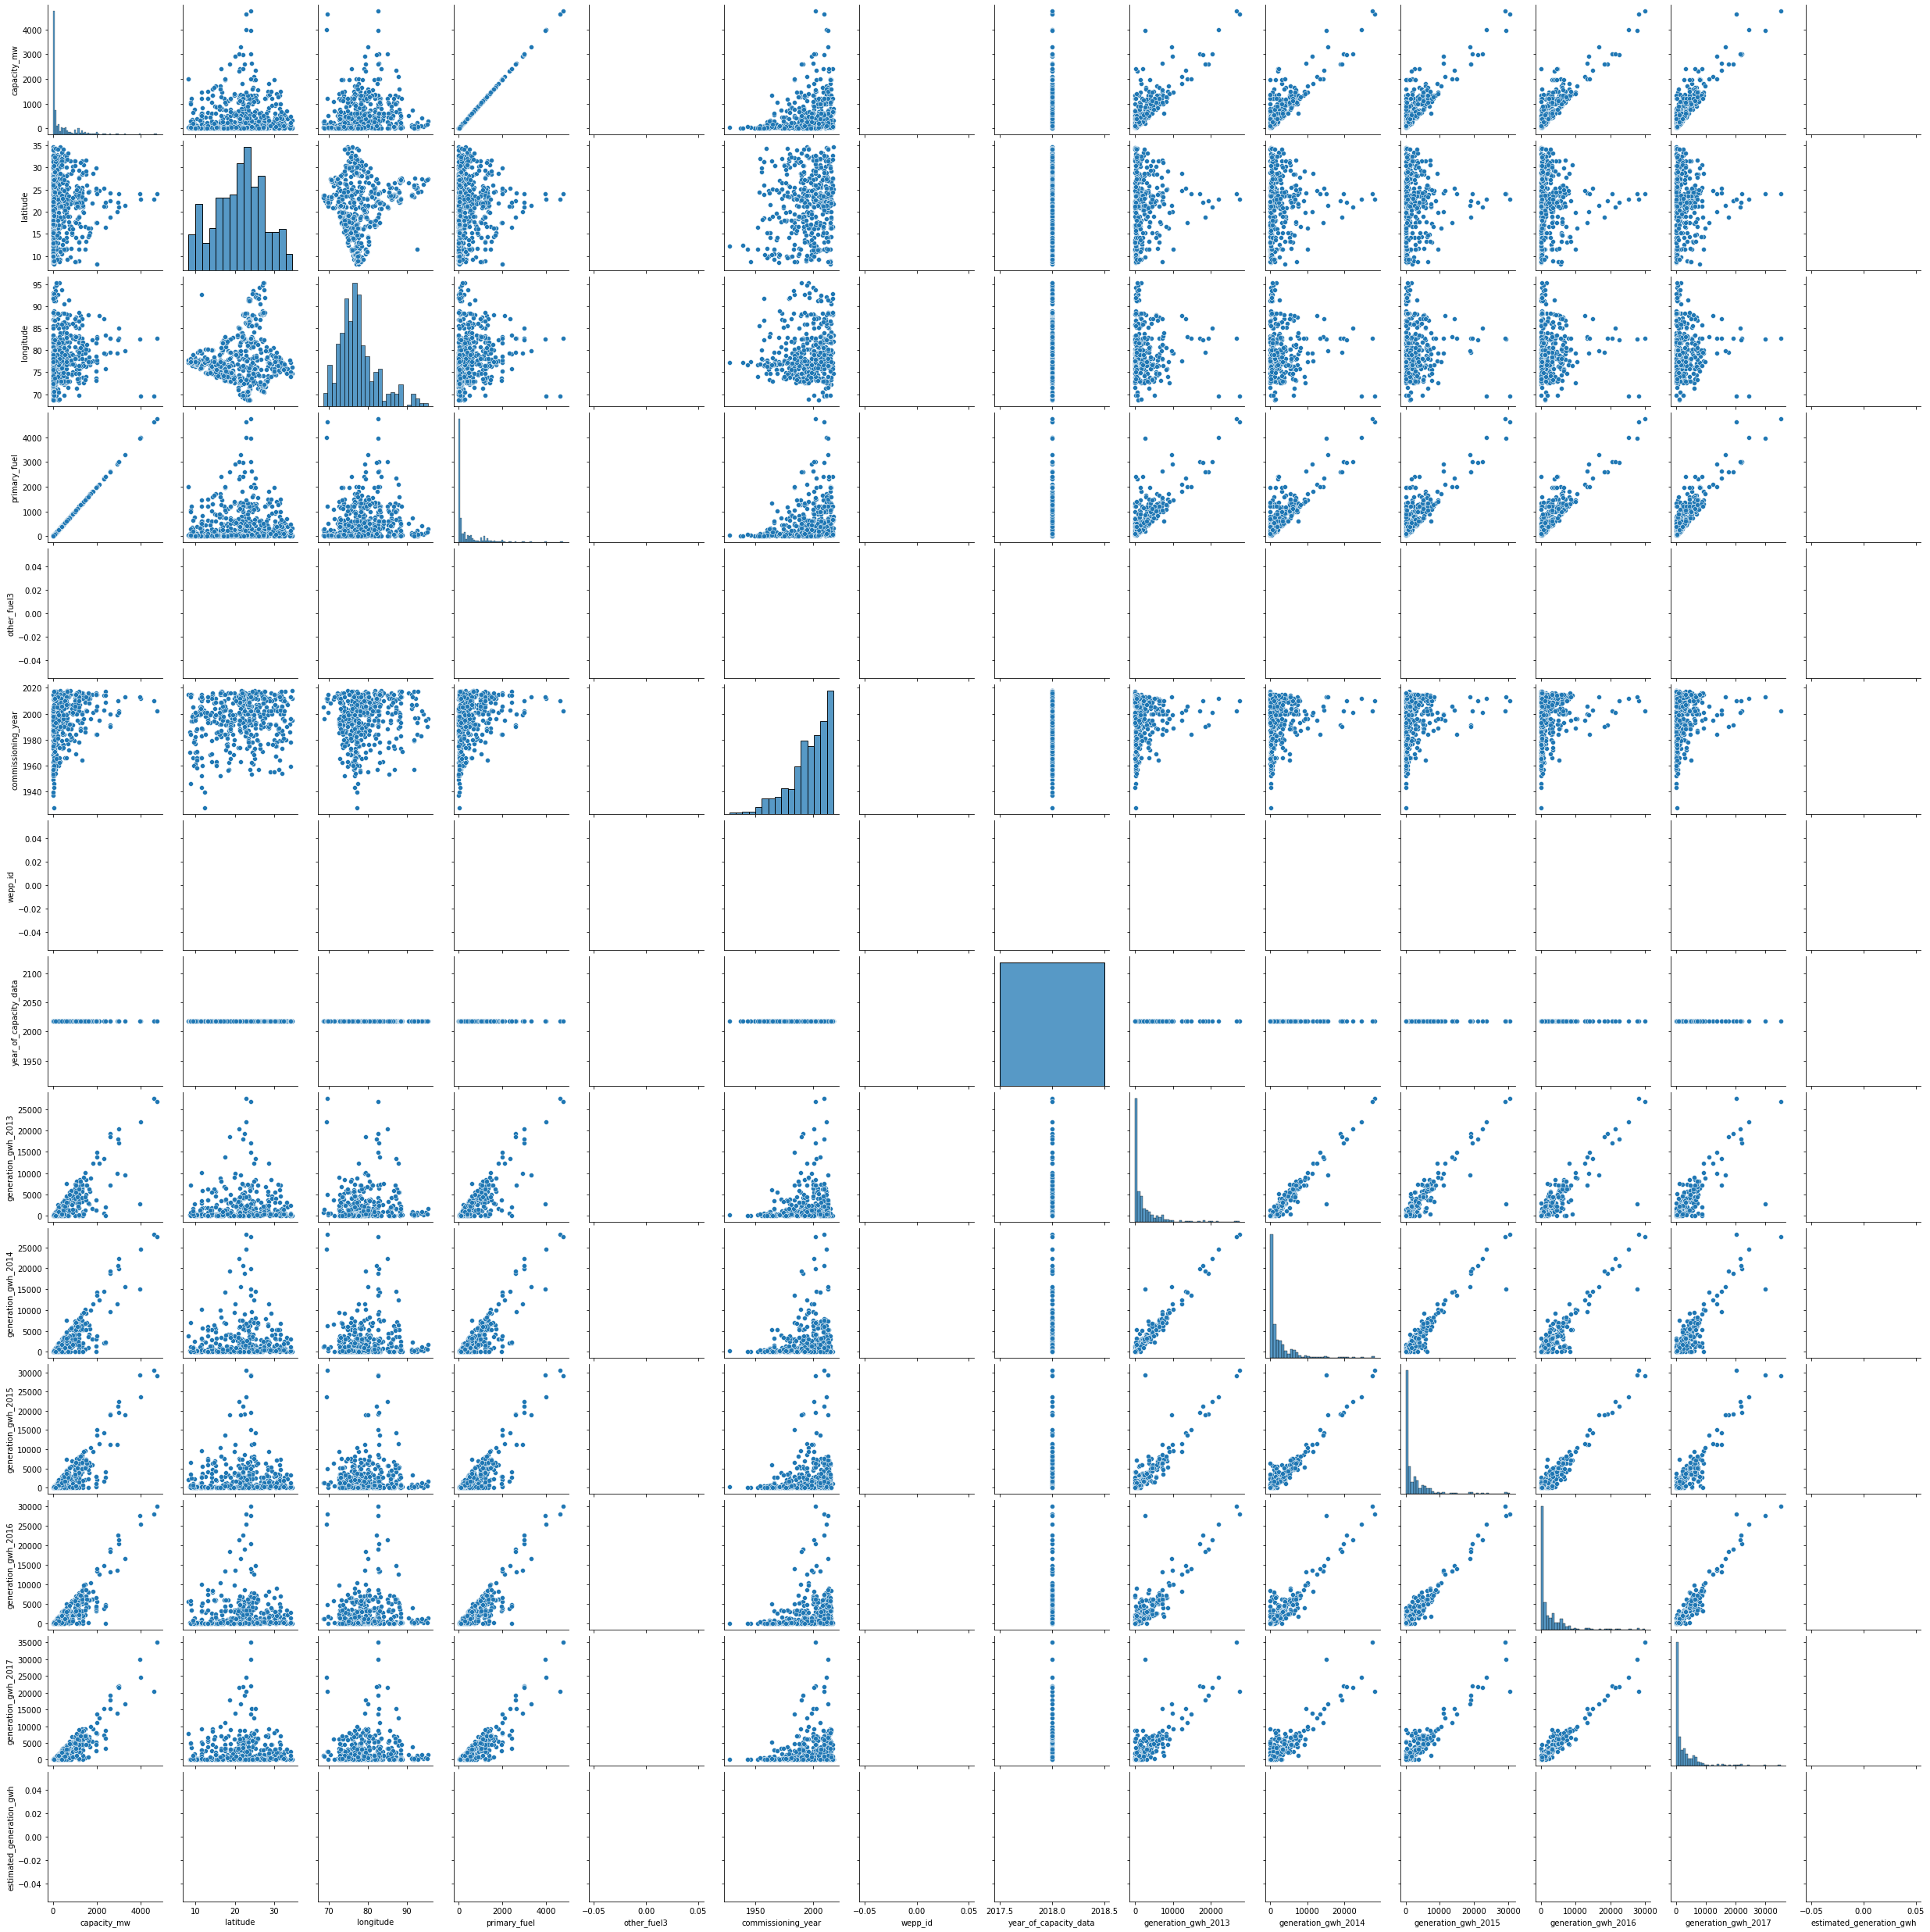

In [24]:
sns.pairplot(df)

India    908
Name: country_long, dtype: int64


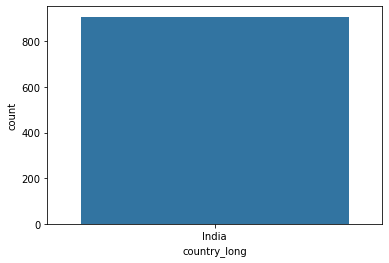

In [25]:
ax=sns.countplot(x="country_long",data=df_visualization_nominal)
print(df_visualization_nominal["country_long"].value_counts())

RAJPURA DARIBA MINE              1
NEPANAGAR MILL                   1
Pokhran FVE Solar Power Plant    1
BINA TPP                         1
KARUPPUR GT                      1
                                ..
KODERMA                          1
NEYVELI TPS EXP -II              1
Bap - OPG Solar Power Plant      1
RELIANCE ENERGY                  1
GFL Gudhepanchgani               1
Name: name, Length: 908, dtype: int64


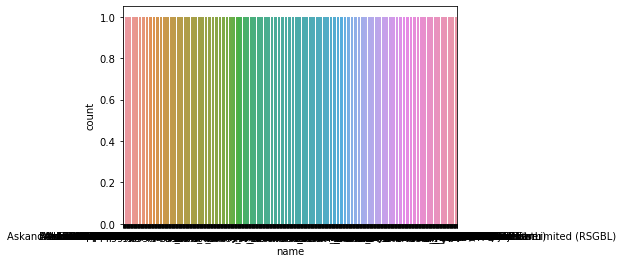

In [26]:
ax=sns.countplot(x="name",data=df_visualization_nominal)
print(df_visualization_nominal["name"].value_counts())

WRI1019882    1
WRI1026096    1
WRI1026680    1
WRI1026132    1
WRI1026118    1
             ..
IND0000007    1
IND0000305    1
IND0000162    1
WRI1019979    1
WRI1026113    1
Name: gppd_idnr, Length: 908, dtype: int64


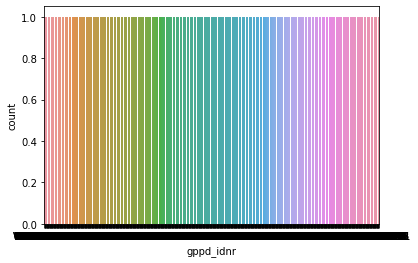

In [27]:
ax=sns.countplot(x="gppd_idnr",data=df_visualization_nominal)
print(df_visualization_nominal["gppd_idnr"].value_counts())

24.1917    3
19.0004    3
10.3118    2
15.1839    2
14.2133    2
          ..
23.9784    1
24.5216    1
17.5010    1
20.9099    1
16.3125    1
Name: latitude, Length: 837, dtype: int64


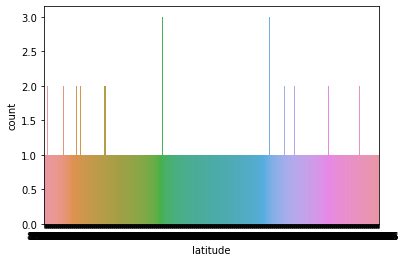

In [28]:
ax=sns.countplot(x="latitude",data=df_visualization_nominal)
print(df_visualization_nominal["latitude"].value_counts())

71.6917    4
75.8988    3
81.2875    3
71.6918    3
72.8983    3
          ..
79.0548    1
78.6463    1
88.4562    1
75.5302    1
87.2500    1
Name: longitude, Length: 828, dtype: int64


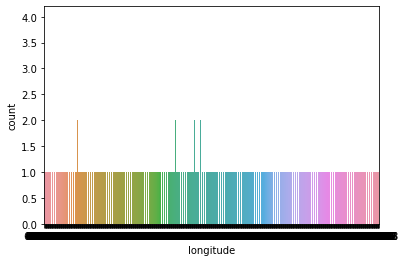

In [29]:
ax=sns.countplot(x="longitude",data=df_visualization_nominal)
print(df_visualization_nominal["longitude"].value_counts())

Oil             196
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


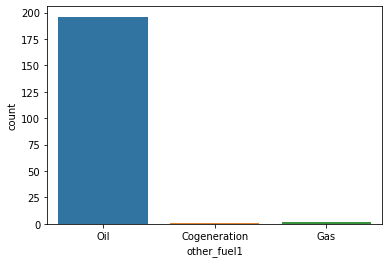

In [30]:
ax=sns.countplot(x="other_fuel1",data=df_visualization_nominal)
print(df_visualization_nominal["other_fuel1"].value_counts())

Oil    1
Name: other_fuel2, dtype: int64


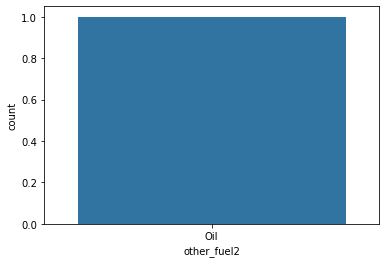

In [31]:
ax=sns.countplot(x="other_fuel2",data=df_visualization_nominal)
print(df_visualization_nominal["other_fuel2"].value_counts())

2013.0    28
2015.0    26
2012.0    23
2016.0    21
2014.0    17
          ..
1939.0     1
1927.0     1
1949.0     1
1956.0     1
1969.0     1
Name: commissioning_year, Length: 73, dtype: int64


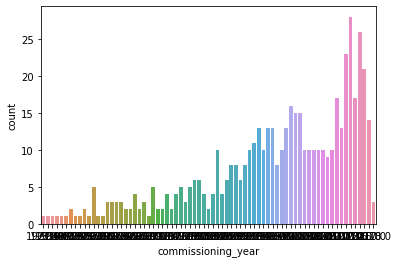

In [32]:
ax=sns.countplot(x="commissioning_year",data=df_visualization_nominal)
print(df_visualization_nominal["commissioning_year"].value_counts())

Jk Cement ltd                                   4
Acc Acc ltd                                     4
Sterling Agro Industries ltd.                   4
Shri Ssk ltd                                    3
Shree Naman Developers Ltd.                     3
                                               ..
Datta Ssk ltd                                   1
Janki Corp ltd                                  1
Solaer                                          1
Bangalore Electricity Supply Company Limited    1
SunBorne Energy Gujarat One Pvt                 1
Name: owner, Length: 280, dtype: int64


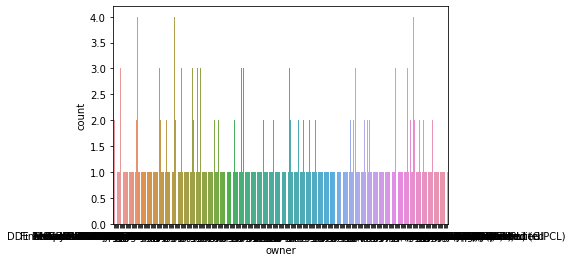

In [33]:
ax=sns.countplot(x="owner",data=df_visualization_nominal)
print(df_visualization_nominal["owner"].value_counts())

Central Electricity Authority                520
CDM                                          124
Lancosola                                     10
National Renewable Energy Laboratory           8
National Thermal Power Corporation (NTPC)      6
                                            ... 
Hiraco India                                   1
Mahatma Power ltd                              1
Core Fuels ltd                                 1
S Limited Rsolar                               1
Kranti Ssk ltd                                 1
Name: source, Length: 191, dtype: int64


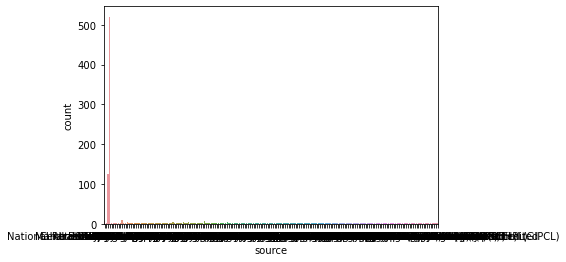

In [34]:
ax=sns.countplot(x="source",data=df_visualization_nominal)
print(df_visualization_nominal["source"].value_counts())

http://www.cea.nic.in/                                                                                                      520
http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.pdf                                                               7
http://www.ntpc.co.in                                                                                                         6
http://viainfotech.biz/Biomass/theme5/document/green_market/REC-project-list.pdf                                              5
http://www.mahaurja.com/PDF/PG2_GridConnSPPCommissioned.pdf                                                                   4
                                                                                                                           ... 
https://cdm.unfccc.int/Projects/DB/URSCert1371557111.17/view                                                                  1
https://cdm.unfccc.int/Projects/DB/BVQI1315830379.2/view                                                

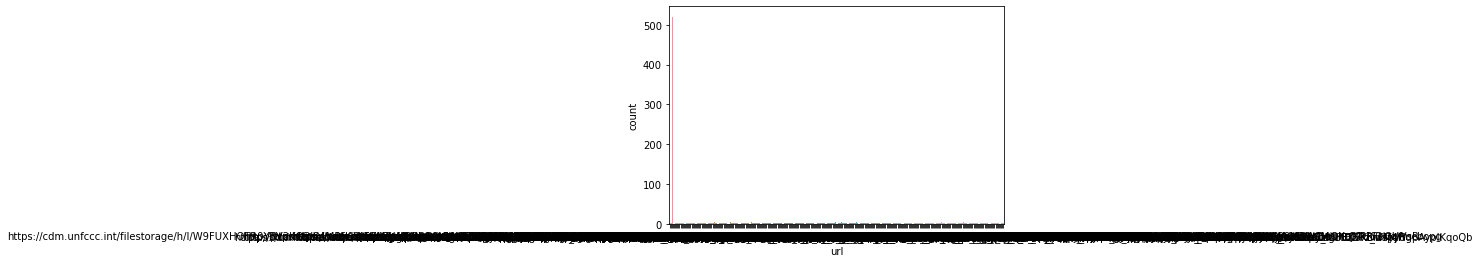

In [35]:
ax=sns.countplot(x="url",data=df_visualization_nominal)
print(df_visualization_nominal["url"].value_counts())

WRI                                     766
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


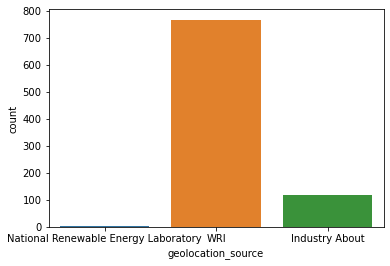

In [36]:
ax=sns.countplot(x="geolocation_source",data=df_visualization_nominal)
print(df_visualization_nominal["geolocation_source"].value_counts())

2018.0    520
Name: year_of_capacity_data, dtype: int64


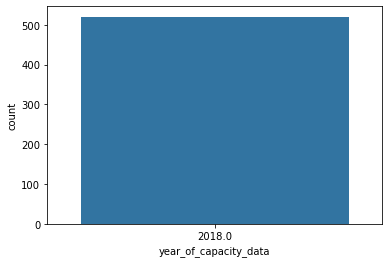

In [37]:
ax=sns.countplot(x="year_of_capacity_data",data=df_visualization_nominal)
print(df_visualization_nominal["year_of_capacity_data"].value_counts())

0.00000       21
1262.13760     1
182.13000      1
108.98235      1
808.83550      1
              ..
2998.44600     1
3683.91000     1
6397.00000     1
941.00000      1
1730.00000     1
Name: generation_gwh_2013, Length: 364, dtype: int64


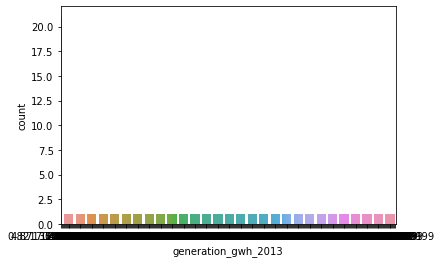

In [38]:
ax=sns.countplot(x="generation_gwh_2013",data=df_visualization_nominal)
print(df_visualization_nominal["generation_gwh_2013"].value_counts())

0.00000        28
483.04300       1
770.18000       1
1014.80000      1
3968.14100      1
               ..
1103.93260      1
18807.00000     1
5380.26710      1
2.85387         1
7744.00000      1
Name: generation_gwh_2014, Length: 374, dtype: int64


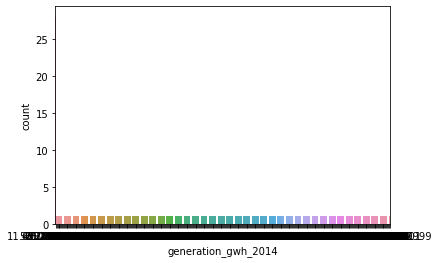

In [39]:
ax=sns.countplot(x="generation_gwh_2014",data=df_visualization_nominal)
print(df_visualization_nominal["generation_gwh_2014"].value_counts())

0.00000       28
240.79990      1
2924.00000     1
3085.49500     1
74.68470       1
              ..
1947.48365     1
588.74000      1
618.90990      1
3480.74000     1
909.00000      1
Name: generation_gwh_2015, Length: 398, dtype: int64


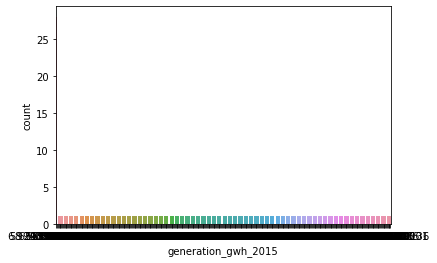

In [40]:
ax=sns.countplot(x="generation_gwh_2015",data=df_visualization_nominal)
print(df_visualization_nominal["generation_gwh_2015"].value_counts())

0.00000       31
1511.00000     2
8470.57000     2
378.68000      1
4529.60000     1
              ..
3212.70000     1
716.72835      1
3203.30000     1
3359.00000     1
509.00000      1
Name: generation_gwh_2016, Length: 405, dtype: int64


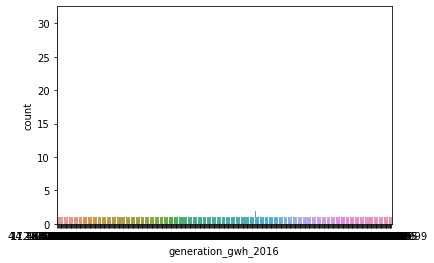

In [41]:
ax=sns.countplot(x="generation_gwh_2016",data=df_visualization_nominal)
print(df_visualization_nominal["generation_gwh_2016"].value_counts())

0.000000       33
170.085300      2
1563.457000     1
7290.568000     1
916.480000      1
               ..
3738.400000     1
802.198850      1
1166.965850     1
82.655645       1
430.000000      1
Name: generation_gwh_2017, Length: 410, dtype: int64


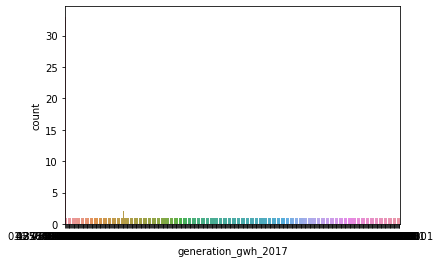

In [42]:
ax=sns.countplot(x="generation_gwh_2017",data=df_visualization_nominal)
print(df_visualization_nominal["generation_gwh_2017"].value_counts())

Central Electricity Authority    450
Name: generation_data_source, dtype: int64


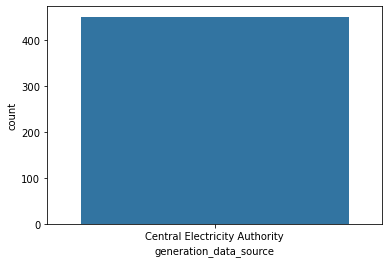

In [43]:
ax=sns.countplot(x="generation_data_source",data=df_visualization_nominal)
print(df_visualization_nominal["generation_data_source"].value_counts())

In [44]:
df_visulization_ordinal=df[["primary_fuel","country_long"]].copy()

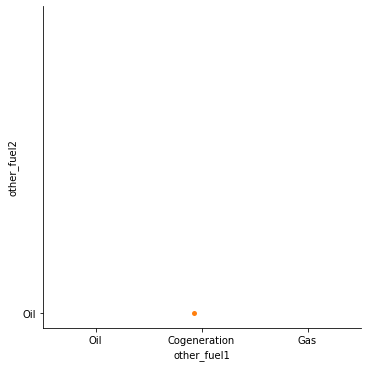

In [48]:
sns.catplot(x="other_fuel1",y="other_fuel2",data=df)

In [49]:
df_visualization_continuous=df[["primary_fuel","capacity_mw"]].copy()

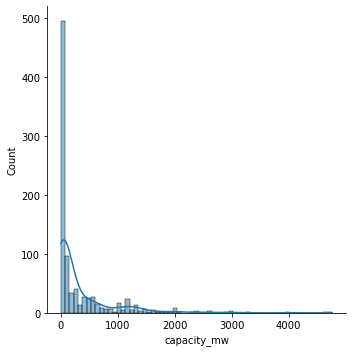

In [51]:
sns.displot(df_visualization_continuous['capacity_mw'],kde=True)

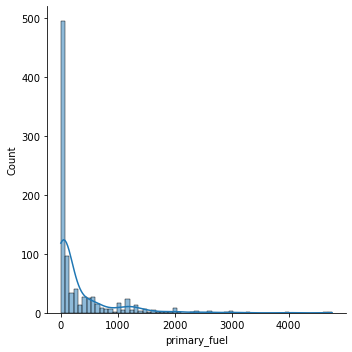

In [52]:
sns.displot(df_visualization_continuous['primary_fuel'],kde=True)

#visualization part is completed.

# Encoding of DataFrame:

In [53]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [73]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

ValueError: Input contains NaN